## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

### l2

In [16]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [28]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [13]:
results = {}
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updati

50000/50000 [==============================] - 8s 161us/step - loss: 1.6165 - acc: 0.5228 - val_loss: 1.7072 - val_acc: 0.4890
Epoch 49/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.6155 - acc: 0.5252 - val_loss: 1.6672 - val_acc: 0.5004
Epoch 50/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6095 - acc: 0.5265 - val_loss: 1.7057 - val_acc: 0.4928
Experiment with Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (

50000/50000 [==============================] - 8s 162us/step - loss: 1.0441 - acc: 0.6847 - val_loss: 1.6412 - val_acc: 0.5020
Epoch 50/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.0336 - acc: 0.6866 - val_loss: 1.5627 - val_acc: 0.5213
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 1

50000/50000 [==============================] - 9s 171us/step - loss: 0.8908 - acc: 0.6899 - val_loss: 1.3706 - val_acc: 0.5369
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 172us/step - loss: 2.0278 - acc: 0.2753 - val_loss: 1.8710 - val_acc: 0.3454
Epoch 2/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.8105 - acc: 0.3649 - val_loss: 1.7662 - val_acc: 0.3740
Epoch 3/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.7290 - acc: 0.3945 - val_loss: 1.7063 - val_acc: 0.3971
Epoch 4/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.6691 - acc: 0.4175 - val_loss: 1.6514 - val_acc: 0.4212
Epoch 5/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6206 - acc: 0.4327 - val_loss: 1.6093 - val_acc: 0.4324
Epoch 6/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.5794 - acc: 0.4475 - val_loss: 1.5863 - val_acc: 0.4395
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.5459 - acc: 0.4583 - val_loss: 1.5488 - 

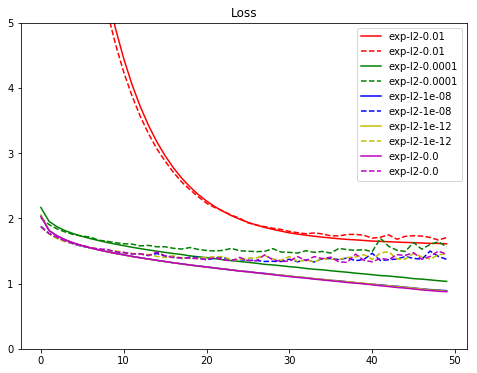

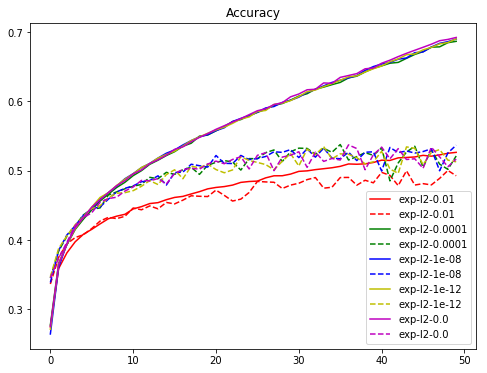

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### l1

In [27]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [29]:
results = {}
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 187us/step - loss: 6.0036 - acc: 0.2765 - val_loss: 5.8141 - val_acc: 0.3482
Epoch 2/50
50000/50000 [==============================] - 8s 167us/step - loss: 5.7274 - acc: 0.3664 - val_loss: 5.6462 - val_acc: 0.3844
Epoch 3/50
50000/50000 [==============================] - 8s 165us/step - loss: 5.5797 - acc: 0.3941 - val_loss: 5.5175 - val_acc: 0.4047
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 5.4575 - acc: 0.4136 - val_loss: 5.4015 - val_acc: 0.4208
Epoch 5/50
50000/50000 [==============================] - 9s 172us/step - loss: 5.3471 - acc: 0.4288 - val_loss: 5.3068 - val_acc: 0.4282
Epoch 6/50
50000/50000 [==============================] - 8s 166us/step - loss: 5.2449 - acc: 0.4443 - val_loss: 5.2066 - val_acc: 0.4452
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 5.1480 - acc: 0.4558 - val_loss: 5.1244 - 

50000/50000 [==============================] - 11s 221us/step - loss: 2.0191 - acc: 0.2772 - val_loss: 1.8500 - val_acc: 0.3494
Epoch 2/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.7944 - acc: 0.3710 - val_loss: 1.7424 - val_acc: 0.3919
Epoch 3/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.7072 - acc: 0.4021 - val_loss: 1.6704 - val_acc: 0.4175
Epoch 4/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6471 - acc: 0.4247 - val_loss: 1.6246 - val_acc: 0.4309
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6002 - acc: 0.4391 - val_loss: 1.5891 - val_acc: 0.4473
Epoch 6/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.5614 - acc: 0.4526 - val_loss: 1.5658 - val_acc: 0.4498
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.5272 - acc: 0.4642 - val_loss: 1.5304 - val_acc: 0.4625
Epoch 8/50
50000/50000 [===================

50000/50000 [==============================] - 8s 163us/step - loss: 1.8002 - acc: 0.3685 - val_loss: 1.7573 - val_acc: 0.3831
Epoch 3/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.7212 - acc: 0.3980 - val_loss: 1.6874 - val_acc: 0.4088
Epoch 4/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6620 - acc: 0.4178 - val_loss: 1.6564 - val_acc: 0.4155
Epoch 5/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.6147 - acc: 0.4365 - val_loss: 1.5940 - val_acc: 0.4418
Epoch 6/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.5717 - acc: 0.4472 - val_loss: 1.5750 - val_acc: 0.4455
Epoch 7/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.5362 - acc: 0.4614 - val_loss: 1.5333 - val_acc: 0.4567
Epoch 8/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.5066 - acc: 0.4721 - val_loss: 1.5172 - val_acc: 0.4697
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 8s 150us/step - loss: 1.7262 - acc: 0.3944 - val_loss: 1.6997 - val_acc: 0.4007
Epoch 4/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.6676 - acc: 0.4147 - val_loss: 1.6569 - val_acc: 0.4120
Epoch 5/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6190 - acc: 0.4313 - val_loss: 1.6140 - val_acc: 0.4322
Epoch 6/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.5789 - acc: 0.4442 - val_loss: 1.5787 - val_acc: 0.4469
Epoch 7/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5435 - acc: 0.4572 - val_loss: 1.5509 - val_acc: 0.4527
Epoch 8/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.5135 - acc: 0.4691 - val_loss: 1.5259 - val_acc: 0.4641
Epoch 9/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.4850 - acc: 0.4804 - val_loss: 1.5156 - val_acc: 0.4666
Epoch 10/50
50000/50000 [====================

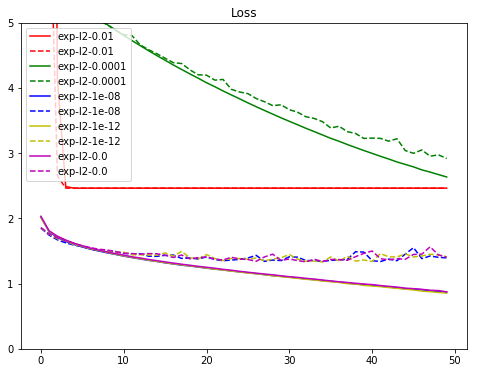

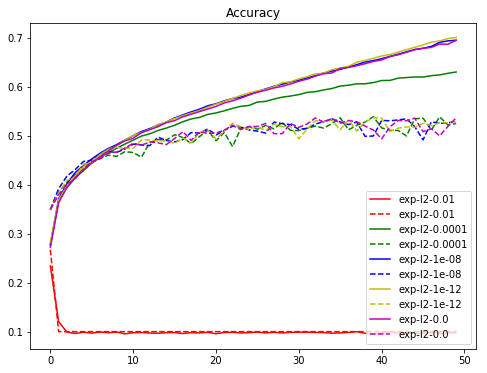

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### l1_l2

In [31]:
from keras.regularizers import l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [32]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [33]:
results = {}
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with L1 = 0.010000, L2 = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 212us/step - loss: 198.7707 - acc: 0.2359 - val_loss: 41.2009 - val_acc: 0.2470
Epoch 2/50
50000/50000 [==============================] - 9s 184us/step - loss: 19.1468 - acc: 0.1169 - val_loss: 7.2932 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 185us/step - loss: 4.1128 - acc: 0.0969 - val_loss: 2.6444 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.4854 - acc: 0.0992 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - acc: 0.0976 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - acc: 0.0985 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - acc: 0.0960 - val_loss: 2.46

Epoch 2/50
50000/50000 [==============================] - 9s 185us/step - loss: 19.1295 - acc: 0.1201 - val_loss: 7.3246 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 186us/step - loss: 4.1316 - acc: 0.1000 - val_loss: 2.6548 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.4872 - acc: 0.0991 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.4626 - acc: 0.0961 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - acc: 0.0978 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - acc: 0.0987 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - acc: 0.0958 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 9/50
50000/50000 [=========

50000/50000 [==============================] - 9s 183us/step - loss: 4.1238 - acc: 0.0995 - val_loss: 2.6496 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.4867 - acc: 0.0968 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - acc: 0.0975 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.4626 - acc: 0.0950 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.4626 - acc: 0.0988 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 9s 183us/step - loss: 2.4626 - acc: 0.0983 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.4626 - acc: 0.0987 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 8s 162us/step - loss: 2.4878 - acc: 0.1000 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 163us/step - loss: 2.4626 - acc: 0.0981 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 163us/step - loss: 2.4626 - acc: 0.0994 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.4626 - acc: 0.0996 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 8s 165us/step - loss: 2.4626 - acc: 0.0974 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.4626 - acc: 0.0958 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.4626 - acc: 0.0972 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 9s 185us/step - loss: 10.5305 - acc: 0.4072 - val_loss: 9.8307 - val_acc: 0.4075
Epoch 6/50
50000/50000 [==============================] - 9s 187us/step - loss: 9.1946 - acc: 0.4121 - val_loss: 8.5999 - val_acc: 0.4132
Epoch 7/50
50000/50000 [==============================] - 9s 188us/step - loss: 8.0542 - acc: 0.4210 - val_loss: 7.5475 - val_acc: 0.4182
Epoch 8/50
50000/50000 [==============================] - 9s 185us/step - loss: 7.0858 - acc: 0.4247 - val_loss: 6.6467 - val_acc: 0.4273
Epoch 9/50
50000/50000 [==============================] - 9s 185us/step - loss: 6.2603 - acc: 0.4266 - val_loss: 5.8917 - val_acc: 0.4286
Epoch 10/50
50000/50000 [==============================] - 9s 187us/step - loss: 5.5560 - acc: 0.4309 - val_loss: 5.2414 - val_acc: 0.4279
Epoch 11/50
50000/50000 [==============================] - 9s 186us/step - loss: 4.9567 - acc: 0.4361 - val_loss: 4.6971 - val_acc: 0.4327
Epoch 12/50
50000/50000 [=================

50000/50000 [==============================] - 13s 267us/step - loss: 5.3426 - acc: 0.4454 - val_loss: 5.3003 - val_acc: 0.4431
Epoch 7/50
50000/50000 [==============================] - 12s 246us/step - loss: 5.2427 - acc: 0.4573 - val_loss: 5.2130 - val_acc: 0.4471
Epoch 8/50
50000/50000 [==============================] - 10s 205us/step - loss: 5.1473 - acc: 0.4683 - val_loss: 5.1136 - val_acc: 0.4677 1s - loss: 5.1501 - acc:  - ETA: 0s - loss: 5.1497 - acc: 
Epoch 9/50
50000/50000 [==============================] - 9s 190us/step - loss: 5.0547 - acc: 0.4795 - val_loss: 5.0284 - val_acc: 0.4682TA: 2s
Epoch 10/50
50000/50000 [==============================] - 10s 191us/step - loss: 4.9646 - acc: 0.4849 - val_loss: 4.9563 - val_acc: 0.4673
Epoch 11/50
50000/50000 [==============================] - 10s 190us/step - loss: 4.8773 - acc: 0.4952 - val_loss: 4.8684 - val_acc: 0.4807
Epoch 12/50
50000/50000 [==============================] - 10s 192us/step - loss: 4.7911 - acc: 0.5025 - val_lo

50000/50000 [==============================] - 10s 191us/step - loss: 5.3410 - acc: 0.4295 - val_loss: 5.3061 - val_acc: 0.4347
Epoch 6/50
50000/50000 [==============================] - 10s 191us/step - loss: 5.2387 - acc: 0.4466 - val_loss: 5.1995 - val_acc: 0.4467
Epoch 7/50
50000/50000 [==============================] - 9s 189us/step - loss: 5.1436 - acc: 0.4556 - val_loss: 5.1106 - val_acc: 0.4538
Epoch 8/50
50000/50000 [==============================] - 10s 192us/step - loss: 5.0540 - acc: 0.4660 - val_loss: 5.0454 - val_acc: 0.4520
Epoch 9/50
50000/50000 [==============================] - 10s 191us/step - loss: 4.9666 - acc: 0.4753 - val_loss: 4.9450 - val_acc: 0.4668
Epoch 10/50
50000/50000 [==============================] - 9s 187us/step - loss: 4.8835 - acc: 0.4850 - val_loss: 4.8644 - val_acc: 0.4795
Epoch 11/50
50000/50000 [==============================] - 9s 187us/step - loss: 4.8011 - acc: 0.4921 - val_loss: 4.7893 - val_acc: 0.4792 - loss: 4.8029 - acc:
Epoch 12/50
50000

Epoch 6/50
50000/50000 [==============================] - 9s 189us/step - loss: 5.2507 - acc: 0.4417 - val_loss: 5.2185 - val_acc: 0.4365
Epoch 7/50
50000/50000 [==============================] - 10s 191us/step - loss: 5.1545 - acc: 0.4549 - val_loss: 5.1233 - val_acc: 0.4521
Epoch 8/50
50000/50000 [==============================] - 9s 190us/step - loss: 5.0656 - acc: 0.4638 - val_loss: 5.0419 - val_acc: 0.4545
Epoch 9/50
50000/50000 [==============================] - 10s 190us/step - loss: 4.9809 - acc: 0.4719 - val_loss: 4.9731 - val_acc: 0.4632
Epoch 10/50
50000/50000 [==============================] - 10s 192us/step - loss: 4.8958 - acc: 0.4825 - val_loss: 4.8851 - val_acc: 0.4657
Epoch 11/50
50000/50000 [==============================] - 9s 190us/step - loss: 4.8147 - acc: 0.4902 - val_loss: 4.8342 - val_acc: 0.4673
Epoch 12/50
50000/50000 [==============================] - 9s 190us/step - loss: 4.7351 - acc: 0.4962 - val_loss: 4.7467 - val_acc: 0.4767
Epoch 13/50
50000/50000 [===

50000/50000 [==============================] - 9s 177us/step - loss: 5.2559 - acc: 0.4389 - val_loss: 5.2133 - val_acc: 0.4453
Epoch 7/50
50000/50000 [==============================] - 8s 159us/step - loss: 5.1610 - acc: 0.4488 - val_loss: 5.1216 - val_acc: 0.4526
Epoch 8/50
50000/50000 [==============================] - 8s 157us/step - loss: 5.0686 - acc: 0.4593 - val_loss: 5.0691 - val_acc: 0.4473
Epoch 9/50
50000/50000 [==============================] - 9s 170us/step - loss: 4.9813 - acc: 0.4686 - val_loss: 4.9834 - val_acc: 0.4549
Epoch 10/50
50000/50000 [==============================] - 8s 163us/step - loss: 4.8971 - acc: 0.4764 - val_loss: 4.8828 - val_acc: 0.4726
Epoch 11/50
50000/50000 [==============================] - 8s 161us/step - loss: 4.8141 - acc: 0.4840 - val_loss: 4.8191 - val_acc: 0.4680
Epoch 12/50
50000/50000 [==============================] - 8s 159us/step - loss: 4.7326 - acc: 0.4924 - val_loss: 4.7313 - val_acc: 0.4801
Epoch 13/50
50000/50000 [=================

50000/50000 [==============================] - 9s 183us/step - loss: 6.8422 - acc: 0.4228 - val_loss: 6.4539 - val_acc: 0.4176
Epoch 8/50
50000/50000 [==============================] - 9s 184us/step - loss: 6.0977 - acc: 0.4243 - val_loss: 5.7636 - val_acc: 0.4259
Epoch 9/50
50000/50000 [==============================] - 9s 184us/step - loss: 5.4625 - acc: 0.4290 - val_loss: 5.1760 - val_acc: 0.4361
Epoch 10/50
50000/50000 [==============================] - 9s 187us/step - loss: 4.9191 - acc: 0.4365 - val_loss: 4.6750 - val_acc: 0.4358
Epoch 11/50
50000/50000 [==============================] - 10s 199us/step - loss: 4.4547 - acc: 0.4403 - val_loss: 4.2569 - val_acc: 0.4334
Epoch 12/50
50000/50000 [==============================] - 9s 189us/step - loss: 4.0576 - acc: 0.4413 - val_loss: 3.8844 - val_acc: 0.4417
Epoch 13/50
50000/50000 [==============================] - 9s 184us/step - loss: 3.7180 - acc: 0.4482 - val_loss: 3.5685 - val_acc: 0.4466
Epoch 14/50
50000/50000 [===============

50000/50000 [==============================] - 9s 186us/step - loss: 1.6432 - acc: 0.4712 - val_loss: 1.6503 - val_acc: 0.4671
Epoch 9/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6161 - acc: 0.4816 - val_loss: 1.6496 - val_acc: 0.4635
Epoch 10/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.5927 - acc: 0.4884 - val_loss: 1.6115 - val_acc: 0.4741
Epoch 11/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.5672 - acc: 0.4987 - val_loss: 1.6041 - val_acc: 0.4816
Epoch 12/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.5460 - acc: 0.5043 - val_loss: 1.5856 - val_acc: 0.4867
Epoch 13/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.5259 - acc: 0.5138 - val_loss: 1.5847 - val_acc: 0.4866
Epoch 14/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.5060 - acc: 0.5205 - val_loss: 1.5697 - val_acc: 0.4931
Epoch 15/50
50000/50000 [===============

50000/50000 [==============================] - 9s 186us/step - loss: 1.4947 - acc: 0.4761 - val_loss: 1.5168 - val_acc: 0.4683
Epoch 10/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.4681 - acc: 0.4871 - val_loss: 1.5068 - val_acc: 0.4666
Epoch 11/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.4443 - acc: 0.4943 - val_loss: 1.4762 - val_acc: 0.4799
Epoch 12/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.4218 - acc: 0.5023 - val_loss: 1.4719 - val_acc: 0.4854
Epoch 13/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.3996 - acc: 0.5091 - val_loss: 1.4488 - val_acc: 0.4855
Epoch 14/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.3788 - acc: 0.5154 - val_loss: 1.4585 - val_acc: 0.4825
Epoch 15/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.3597 - acc: 0.5230 - val_loss: 1.4379 - val_acc: 0.4912
Epoch 16/50
50000/50000 [==============

50000/50000 [==============================] - 9s 180us/step - loss: 1.4597 - acc: 0.4882 - val_loss: 1.4811 - val_acc: 0.4746
Epoch 11/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.4359 - acc: 0.4976 - val_loss: 1.4697 - val_acc: 0.4820
Epoch 12/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.4164 - acc: 0.5016 - val_loss: 1.4591 - val_acc: 0.4858
Epoch 13/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.3960 - acc: 0.5099 - val_loss: 1.4474 - val_acc: 0.4902
Epoch 14/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.3751 - acc: 0.5161 - val_loss: 1.4341 - val_acc: 0.4911
Epoch 15/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.3557 - acc: 0.5232 - val_loss: 1.4291 - val_acc: 0.4914
Epoch 16/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.3391 - acc: 0.5317 - val_loss: 1.4130 - val_acc: 0.4984
Epoch 17/50
50000/50000 [=============

50000/50000 [==============================] - 9s 170us/step - loss: 1.4399 - acc: 0.4947 - val_loss: 1.4859 - val_acc: 0.4758
Epoch 12/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.4180 - acc: 0.5026 - val_loss: 1.4857 - val_acc: 0.4726
Epoch 13/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.3949 - acc: 0.5117 - val_loss: 1.4573 - val_acc: 0.4870
Epoch 14/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.3739 - acc: 0.5171 - val_loss: 1.4551 - val_acc: 0.4835
Epoch 15/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.3549 - acc: 0.5235 - val_loss: 1.4153 - val_acc: 0.5009
Epoch 16/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.3346 - acc: 0.5328 - val_loss: 1.4370 - val_acc: 0.4882
Epoch 17/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.3167 - acc: 0.5369 - val_loss: 1.4441 - val_acc: 0.4869
Epoch 18/50
50000/50000 [==============

50000/50000 [==============================] - 9s 182us/step - loss: 4.0545 - acc: 0.4455 - val_loss: 3.8900 - val_acc: 0.4351
Epoch 13/50
50000/50000 [==============================] - 9s 184us/step - loss: 3.7126 - acc: 0.4506 - val_loss: 3.5698 - val_acc: 0.4430
Epoch 14/50
50000/50000 [==============================] - 9s 188us/step - loss: 3.4210 - acc: 0.4517 - val_loss: 3.3035 - val_acc: 0.4482
Epoch 15/50
50000/50000 [==============================] - 9s 182us/step - loss: 3.1718 - acc: 0.4558 - val_loss: 3.0699 - val_acc: 0.4516
Epoch 16/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.9572 - acc: 0.4597 - val_loss: 2.8689 - val_acc: 0.4573
Epoch 17/50
50000/50000 [==============================] - 10s 206us/step - loss: 2.7726 - acc: 0.4648 - val_loss: 2.7058 - val_acc: 0.4562
Epoch 18/50
50000/50000 [==============================] - 11s 214us/step - loss: 2.6141 - acc: 0.4665 - val_loss: 2.5560 - val_acc: 0.4626
Epoch 19/50
50000/50000 [===========

50000/50000 [==============================] - 9s 178us/step - loss: 1.5410 - acc: 0.5076 - val_loss: 1.5943 - val_acc: 0.4846
Epoch 14/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.5187 - acc: 0.5138 - val_loss: 1.5727 - val_acc: 0.4980
Epoch 15/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.4991 - acc: 0.5247 - val_loss: 1.5702 - val_acc: 0.4950
Epoch 16/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.4803 - acc: 0.5297 - val_loss: 1.5590 - val_acc: 0.4985
Epoch 17/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.4642 - acc: 0.5353 - val_loss: 1.5517 - val_acc: 0.5024
Epoch 18/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.4449 - acc: 0.5422 - val_loss: 1.5508 - val_acc: 0.4990
Epoch 19/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.4292 - acc: 0.5471 - val_loss: 1.5598 - val_acc: 0.4945
Epoch 20/50
50000/50000 [==============

Epoch 14/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.3705 - acc: 0.5185 - val_loss: 1.4308 - val_acc: 0.4909
Epoch 15/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.3494 - acc: 0.5245 - val_loss: 1.4262 - val_acc: 0.4958
Epoch 16/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.3309 - acc: 0.5309 - val_loss: 1.4162 - val_acc: 0.4995
Epoch 17/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.3139 - acc: 0.5371 - val_loss: 1.4136 - val_acc: 0.5048
Epoch 18/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.2984 - acc: 0.5416 - val_loss: 1.3963 - val_acc: 0.5051
Epoch 19/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.2798 - acc: 0.5495 - val_loss: 1.3989 - val_acc: 0.5047
Epoch 20/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.2627 - acc: 0.5570 - val_loss: 1.3986 - val_acc: 0.5052
Epoch 21/50
50000/50000 [

Epoch 15/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.3546 - acc: 0.5235 - val_loss: 1.4197 - val_acc: 0.4975
Epoch 16/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.3354 - acc: 0.5298 - val_loss: 1.4185 - val_acc: 0.4943
Epoch 17/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.3159 - acc: 0.5367 - val_loss: 1.4064 - val_acc: 0.4993
Epoch 18/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.2989 - acc: 0.5425 - val_loss: 1.3957 - val_acc: 0.4997
Epoch 19/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.2853 - acc: 0.5462 - val_loss: 1.3946 - val_acc: 0.5058
Epoch 20/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.2652 - acc: 0.5544 - val_loss: 1.4170 - val_acc: 0.4968
Epoch 21/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.2496 - acc: 0.5604 - val_loss: 1.3929 - val_acc: 0.5034
Epoch 22/50
50000/50000

50000/50000 [==============================] - 8s 164us/step - loss: 1.3331 - acc: 0.5306 - val_loss: 1.4207 - val_acc: 0.4902
Epoch 17/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.3163 - acc: 0.5388 - val_loss: 1.4279 - val_acc: 0.4865
Epoch 18/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.2982 - acc: 0.5424 - val_loss: 1.3962 - val_acc: 0.5016
Epoch 19/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.2814 - acc: 0.5505 - val_loss: 1.4156 - val_acc: 0.4974
Epoch 20/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.2681 - acc: 0.5547 - val_loss: 1.4115 - val_acc: 0.4986
Epoch 21/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.2512 - acc: 0.5605 - val_loss: 1.4247 - val_acc: 0.4982
Epoch 22/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.2374 - acc: 0.5655 - val_loss: 1.3650 - val_acc: 0.5158
Epoch 23/50
50000/50000 [==============

50000/50000 [==============================] - 8s 158us/step - loss: 2.7647 - acc: 0.4668 - val_loss: 2.6972 - val_acc: 0.4577
Epoch 18/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.6076 - acc: 0.4709 - val_loss: 2.5447 - val_acc: 0.4711
Epoch 19/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.4724 - acc: 0.4725 - val_loss: 2.4272 - val_acc: 0.4723
Epoch 20/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.3577 - acc: 0.4743 - val_loss: 2.3158 - val_acc: 0.4728
Epoch 21/50
50000/50000 [==============================] - 8s 161us/step - loss: 2.2579 - acc: 0.4774 - val_loss: 2.2397 - val_acc: 0.4690
Epoch 22/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.1723 - acc: 0.4818 - val_loss: 2.1681 - val_acc: 0.4703
Epoch 23/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.0982 - acc: 0.4834 - val_loss: 2.1366 - val_acc: 0.4577
Epoch 24/50
50000/50000 [==============

50000/50000 [==============================] - 8s 160us/step - loss: 1.4361 - acc: 0.5436 - val_loss: 1.5799 - val_acc: 0.4873
Epoch 19/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.4215 - acc: 0.5508 - val_loss: 1.5490 - val_acc: 0.4943
Epoch 20/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.4055 - acc: 0.5534 - val_loss: 1.5172 - val_acc: 0.5123
Epoch 21/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.3912 - acc: 0.5607 - val_loss: 1.5281 - val_acc: 0.5042
Epoch 22/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.3737 - acc: 0.5640 - val_loss: 1.5460 - val_acc: 0.5059
Epoch 23/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.3609 - acc: 0.5698 - val_loss: 1.4945 - val_acc: 0.5209
Epoch 24/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.3449 - acc: 0.5758 - val_loss: 1.5101 - val_acc: 0.5132
Epoch 25/50
50000/50000 [==============

50000/50000 [==============================] - 8s 159us/step - loss: 1.2741 - acc: 0.5520 - val_loss: 1.3876 - val_acc: 0.5044
Epoch 20/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.2607 - acc: 0.5571 - val_loss: 1.3713 - val_acc: 0.5143
Epoch 21/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.2437 - acc: 0.5616 - val_loss: 1.3774 - val_acc: 0.5106
Epoch 22/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.2299 - acc: 0.5647 - val_loss: 1.3961 - val_acc: 0.5109
Epoch 23/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.2121 - acc: 0.5729 - val_loss: 1.3581 - val_acc: 0.5226
Epoch 24/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.2004 - acc: 0.5772 - val_loss: 1.3625 - val_acc: 0.5215
Epoch 25/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.1853 - acc: 0.5828 - val_loss: 1.3496 - val_acc: 0.5233
Epoch 26/50
50000/50000 [==============

50000/50000 [==============================] - 8s 160us/step - loss: 1.2672 - acc: 0.5549 - val_loss: 1.3682 - val_acc: 0.5127
Epoch 21/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.2492 - acc: 0.5607 - val_loss: 1.3565 - val_acc: 0.5129
Epoch 22/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.2349 - acc: 0.5676 - val_loss: 1.3730 - val_acc: 0.5121
Epoch 23/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.2192 - acc: 0.5724 - val_loss: 1.3537 - val_acc: 0.5196
Epoch 24/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.2034 - acc: 0.5792 - val_loss: 1.3673 - val_acc: 0.5103
Epoch 25/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.1894 - acc: 0.5835 - val_loss: 1.3603 - val_acc: 0.5137
Epoch 26/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.1760 - acc: 0.5877 - val_loss: 1.3585 - val_acc: 0.5127
Epoch 27/50
50000/50000 [==============

50000/50000 [==============================] - 7s 138us/step - loss: 1.2412 - acc: 0.5614 - val_loss: 1.3679 - val_acc: 0.5136
Epoch 22/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.2284 - acc: 0.5690 - val_loss: 1.3534 - val_acc: 0.5205
Epoch 23/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.2102 - acc: 0.5746 - val_loss: 1.3449 - val_acc: 0.5257
Epoch 24/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.1962 - acc: 0.5799 - val_loss: 1.3594 - val_acc: 0.5192
Epoch 25/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.1820 - acc: 0.5846 - val_loss: 1.3796 - val_acc: 0.5155
Epoch 26/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.1703 - acc: 0.5892 - val_loss: 1.3387 - val_acc: 0.5265
Epoch 27/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.1531 - acc: 0.5958 - val_loss: 1.3500 - val_acc: 0.5244
Epoch 28/50
50000/50000 [==============

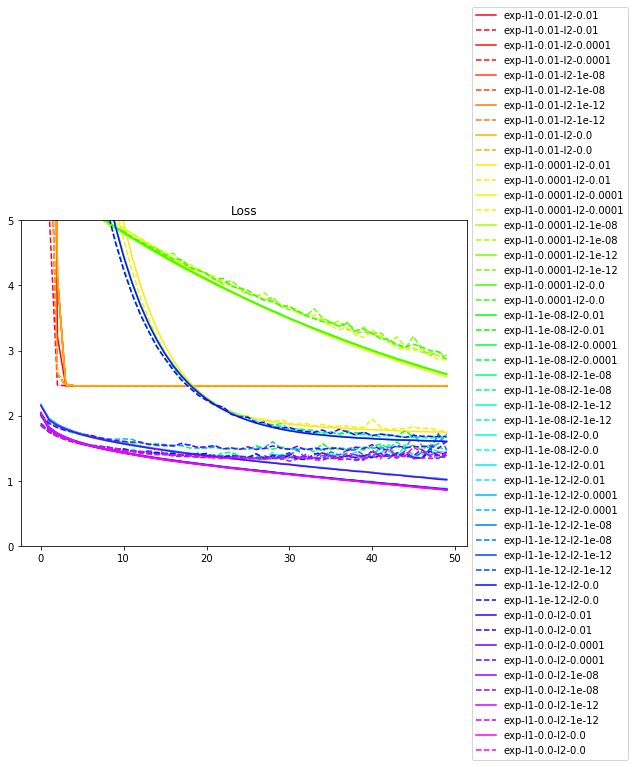

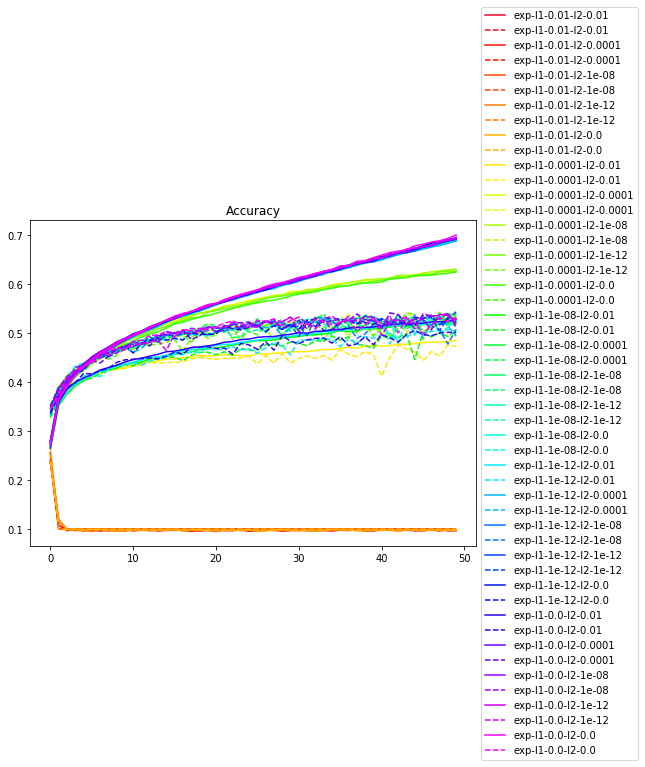

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()